#                       Mexico's COVID19 Data description and Analisys


<img align="center" src="https://i.imgur.com/ywPyXHY.png">


<a href = 'https://coronavirus.gob.mx/datos/#DownZCSV'>
    <img align="center" src="https://i.imgur.com/EgVX1r8.png">
</a>

# Loading data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta

In [4]:
# Pacient data contains detail information about every subject in the database, age, sex, and some illness history
patient_data = pd.read_csv('200526COVID19MEXICO.csv', encoding='ANSI')
# Confirmed is the number of comfirmed cases each day
confirmed = pd.read_csv('Casos_Diarios_Estado_Nacional_Confirmados_20200526.csv', encoding='ANSI')
# Suspicious is the number of suspicious cases each day
suspicious = pd.read_csv('Casos_Diarios_Estado_Nacional_Sospechosos_20200526.csv', encoding='ANSI')
# Negatives is the number of negative test cases each day
negatives = pd.read_csv('Casos_Diarios_Estado_Nacional_Negativos_20200526.csv', encoding='ANSI')
# Deaths is the number of deceased cases each day
deaths = pd.read_csv('Casos_Diarios_Estado_Nacional_Defunciones_20200526.csv', encoding='ANSI')
# State_names is an array with the names of each state
state_names = deaths.nombre.values

In [ ]:
confirmed.nombre

# 1.- Frequency of cases

## Confirmed, Deaths, Negative and Suspicious Data

In [ ]:
# Confirmed, negative, deaths and suspicious dataFrames have the same structure.
confirmed.head()

### State Names

In [ ]:
# State names for confirmed, suspicious, negative and deaths data, patient_date states names are a little different
state_names

### Functions to get discrete or cummulative data from any particular state

In [ ]:
# Functions to get formated data from a particular state
# Both functions take a name and a database. (name='state_name',raw_data=database)
# works only for the confirmed, suspicious, negative and deaths databases
# patient_data is different.
from data_helpers import get_discrete, get_cummulative

In [ ]:
discrete_mexico_city_deaths = get_discrete('DISTRITO FEDERAL',deaths)
cummulative_mexico_city_deaths = get_cummulative('DISTRITO FEDERAL',deaths)

### get_discrete() gives an array for each day incidents

In [ ]:
discrete_mexico_city_deaths

### get_cummulative() gives a list of the cummulative record by day

In [ ]:
cummulative_mexico_city_deaths[28:50]


### Function to plot discrete data

In [ ]:
# plot_discrete(data, names = None, colors=None, title=None, trim=None)
# Data should be an array of tuples: [('State name', database),('State name2', database)]
# database should be: confirmed, suspicious, negatives or deaths.
# If names = None, then each 'State name' will be use
# You can choose the colors of each state by passing an array: ['r','b','y'...]
# Or passing a string like: 'rbgy' if each of the colors are one letter in the matplotlib documentation.
# If colors = None, colors will be a cycle from the default: 'b', 'g', 'r', 'c', 'm' and 'y'
# Trim is the number of days to skip at the beginning, since the first month or so are usually empty.

def plot_discrete(data,names = None, colors=None, title=None, trim=None):
    plt.close('all')
    plt.style.use('seaborn-whitegrid')

    plt.rcParams["figure.figsize"] = (15,6)
    
    plot_data = []
    if names == None:
        labels = []
    else:
        labels = names
    
    for state in data:
        plot_data.append(get_discrete(state[0],state[1]))
        if names == None:
            labels.append(state[0])
    
    max_len = max([len(x) for x in plot_data])
    
    last_day = confirmed.columns[-1]
    
    index = pd.date_range(start=pd.to_datetime(confirmed.columns[-1]) - timedelta(days=max_len), periods=max_len, freq='D')
    
    if colors == None:
            colors ='bgrcmy'* int(np.ceil(len(plot_data)/6))
       
    for ind, i in enumerate(plot_data):
        if len(i) < max_len:
            i = [0]*(max_len-len(i))+list(i)
        
        plt.bar(index,i, label = labels[ind],color = colors[ind],alpha = 0.5)
       
    plt.title(title, fontsize=14)
    plt.legend(loc='upper left',fontsize=12)
    plt.xticks(rotation=90)
    if trim:
        plt.xlim(index[0] + timedelta(days=trim),)
    plt.show()

## National discrete data

In [ ]:
plot_discrete(data = [('Nacional',confirmed),
                     ('Nacional',deaths),
                     ('Nacional',suspicious)],
              names =['Confirmed','Deaths','Suspicious'],
              colors=['g','r','b'],
              title='Deaths by day in Mexico',
              trim=70)

## Metropolitan area, discrete, death and confirmed

In [ ]:
plot_discrete([('DISTRITO FEDERAL',confirmed),
                  ('MEXICO',confirmed),
                  ('DISTRITO FEDERAL',deaths),
                  ('MEXICO',deaths)],
                  names =['Mexico city confirmed','Mexico state confirmed',
                          'Mexico city Deaths','Mexico state Deaths'],
                  colors=['g','b','r','orange'],
                  title='Confirmed and Deaths in Mexico City and Mexico State',
                  trim=65)

### Function to plot cummulative data

In [ ]:
# Same Instructions of the discrete data apply here

def plot_cummulative(data, names = None, colors = None, title = None, trim=None):
    plt.close('all')
    plt.style.use('seaborn-whitegrid')

    plt.rcParams["figure.figsize"] = (15,7)
    
    plot_data = []
    if names == None:
        labels = []
    else:
        labels = names
    
    for state in data:
        plot_data.append(get_cummulative(state[0],state[1]))
        if names == None:
            labels.append(state[0])
    
    max_len = max([len(x) for x in plot_data])
    last_day = confirmed.columns[-1]
    
    index = pd.date_range(start=pd.to_datetime(deaths.columns[-1]) - timedelta(days=max_len), periods=max_len, freq='D', closed = None)
    
    if not colors:
        colors ='bgrcmy'* int(np.ceil(len(plot_data)/6))
    
    for ind,i in enumerate(plot_data):
        if len(i) != max_len:
            i = [0]*(max_len-len(i))+i
        
        plt.plot(index,i,label=labels[ind],color=colors[ind])
        plt.scatter(index[-1],i[-1],color=colors[ind])
        plt.text(index[-1], i[-1],str(int(i[-1])) , fontsize=14 ,color=colors[ind])
        plt.fill_between(index, i, color = colors[ind], alpha = 0.4)
               
    plt.xticks(rotation=90,fontsize=13)
    plt.title(title, fontsize=14)
    
    if trim:
        plt.xlim(index[0] + timedelta(days=trim),)
        
    plt.legend(loc='upper left',fontsize=14)
    plt.show()

## National cummulative record for confirmed, suspicious, and deaths

In [ ]:
plot_cummulative([('National',confirmed),
                  ('National',suspicious),
                  ('National',deaths)],
                  names =['Confirmed','Suspicious','Deaths'],
                  colors=['g','b','r'],
                  title='Confirmed, Suspicious and Deaths in Mexico',
                  trim=70)

## Metropolitan area cummulative, death and confirmed

In [ ]:
plot_cummulative([('DISTRITO FEDERAL',confirmed),
                  ('MEXICO',confirmed),
                  ('DISTRITO FEDERAL',deaths),
                  ('MEXICO',deaths)],
                  names =['Mexico city confirmed','Mexico state confirmed',
                          'Mexico city Deaths','Mexico state Deaths'],
                  colors=['g','b','r','orange'],
                  title='Confirmed and Deaths in Mexico City and Mexico State',
                  trim=65)

## Ploting all data from max to min.

### Function to get several states sorted from max to min.

In [ ]:
from data_helpers import get_max_to_min
# This function returns a list with the state names from max to min incidence and a dictionary with the actual values
# name_array, dictionary = get_max_to_min(raw_data, include_national = False, reverse = False)
# raw_data is the database: confirmed, negatives, suspicious or deaths.
# National data is naturally much more higher that any particular state, by default is ommited
# To include National set the parameter include_national to True
# To return the list from MIN to MAX set reverse to True

### Function to plot the data from get_max_to_min()

In [ ]:
# Raw_data is the database of origin: deaths, confirmed, etc...
# N is the number of states that will be plotted, if None is True, then all of them will output
# If the Discrete parameter is False then cummulative data will be plotted
# reverse is set to True the min to max will be plotted

def plot_max_to_min(raw_data,
                    n = None,
                    discrete = True,
                    title = None,
                    colors = None,
                    trim = None,
                    include_national = False,
                    reverse = False):
    
    names = get_max_to_min(raw_data, include_national = include_national, reverse = reverse)[0][:n]
    data = []
    for name in names:
        data.append((name,raw_data))
        
    if discrete:
        
        plot_discrete(data = data,
                      colors = colors,
                      title = title,
                      trim = trim)
    else:
                
        plot_cummulative(data = data,
                         colors = colors,
                         title = title,
                         trim = trim)

## Discrete states from max to min incidence

In [ ]:
plot_max_to_min(raw_data = confirmed,
                n=16,
                discrete=True,
                title='Mexico States with more Confirmed cases by Day',
                trim=60,
                reverse = False) 

## Cummulative states from max to min incidence

In [ ]:
plot_max_to_min(raw_data = confirmed,
                n=14,
                discrete=False,
                title='Mexico States with more Confirmed cases by Day',
                trim=70,
                reverse = False)

## Cummulative states from min to max deaths

In [ ]:
plot_max_to_min(raw_data = deaths,
                n=14,
                discrete=False,
                title='Cummulative States with less deaths',
                trim=0,
                reverse = True)

## Bar graph for all states min to max

### Deaths

In [ ]:
bar_data = get_max_to_min(deaths, include_national = False, reverse = True)

plt.bar(bar_data[0],[bar_data[1][x] for x in bar_data[0]], color='r',alpha=0.5)
plt.xticks(rotation=90,fontsize=14)
for i in range(len(bar_data[0])):
    value = bar_data[1][bar_data[0][i]]
    plt.text(i-0.3, value + 25, str(value), color='black', fontweight='bold')
plt.title('Deaths from min to max', fontsize=16)
plt.show()

### Confirmed

In [ ]:
bar_data = get_max_to_min(confirmed, include_national = False, reverse = True)
plt.bar(bar_data[0],[bar_data[1][x] for x in bar_data[0]], color='b',alpha=0.7, label = 'Confirmados')
plt.xticks(rotation=90,fontsize=14)
for i in range(len(bar_data[0])):
    value = bar_data[1][bar_data[0][i]]
    if i < 15:
        plt.text(i-0.3, value + 100, str(value), color='black', fontweight='bold')
    else:
        plt.text(i-0.6, value + 100, str(value), color='black', fontweight='bold')

plt.title('Confirmed from min to max', fontsize=16)
plt.legend(fontsize=16)
plt.show()

# 2.- Patients Data

### Cleaning the database

In [5]:
# Eliminate data from counties column, since it lacks one term an it's useless without it
patient_data = patient_data.drop('MUNICIPIO_RES',axis=1)

### Renaming columns to english

In [6]:
patient_data = patient_data.rename(columns={"FECHA_ACTUALIZACION":"Updated_at",
                                             "ID_REGISTRO": "id",
                                             "ORIGEN":"origin",
                                             "SECTOR":"sector",
                                             "ENTIDAD_UM": "treated_at",
                                             "SEXO": "sex",
                                             "ENTIDAD_NAC":"borne_at",
                                             "ENTIDAD_RES": "lives_at",
                                             "TIPO_PACIENTE": "pacient_type",
                                             "FECHA_INGRESO":"admission_date",
                                             "FECHA_SINTOMAS":"onset_symptoms",
                                             "FECHA_DEF": "day_of_death",
                                             "INTUBADO": "intubated",
                                             "NEUMONIA":"pneumonia",
                                             "EDAD":"age",
                                             "NACIONALIDAD":"is_mexican",
                                             "EMBARAZO":"pregnancy",
                                             "HABLA_LENGUA_INDIG":"speaks_dialect",
                                             "DIABETES":"diabetes",
                                             "EPOC": "copd",
                                             "ASMA":"asthma",
                                             "INMUSUPR":"immunosuppression",
                                             "HIPERTENSION":"hypertension",
                                             "OTRA_COM":"another_illness",
                                             "CARDIOVASCULAR":"cardiovascular",
                                             "OBESIDAD":"obesity",
                                             "RENAL_CRONICA":"kidney_disease",
                                             "TABAQUISMO":"smoker",
                                             "OTRO_CASO":"close_to_infected",
                                             "RESULTADO":"result",
                                             "MIGRANTE":"migrant",
                                             "PAIS_NACIONALIDAD":"nationality",
                                             "PAIS_ORIGEN": "country_of_origin",
                                             "UCI":"icu"})

### Data keys:

In [ ]:
patient_data.keys()

### Data sample

In [ ]:
patient_data.head()

### Loading a function to translate the codes from the data

In [ ]:
from data_helpers import patient_data_keys
# Some data is coded, for example from column:  patient_data['sector'],
# This function takes the column name and a key to decoded
# if the key == None, then outputs all the codes from the column

In [ ]:
patient_data_keys('result',key=1)

In [ ]:
patient_data_keys('sector',key=None)

# Exploring the database

### General subsets

In [7]:
men = patient_data[patient_data['sex']==2]
women = patient_data[patient_data['sex']==1]
alive = patient_data[patient_data['day_of_death']=='9999-99-99']
deceased = patient_data[patient_data['day_of_death']!='9999-99-99']
deceased = deceased[deceased['result']==1]
men_deceased = deceased[deceased['sex']==2]
women_deceased =  deceased[deceased['sex']==1]

## Which sector do they came from:

## Two biggest sectors:

In [ ]:
sector_bins = {key:0 for key in set(patient_data['sector'])}

for sector in patient_data['sector']:
        sector_bins[sector]+=1

plt.bar(['IMSS','SSA'],[sector_bins[4],sector_bins[12]])
plt.text('IMSS', sector_bins[4] + 1000, str(round((sector_bins[4]/len(patient_data)*100),2))+'%', color='black',fontsize=20)
plt.text('SSA', sector_bins[12] + 1000, str(round((sector_bins[12]/len(patient_data)*100),2))+'%', color='black',fontsize=20)

plt.title('Sectors with more patients',fontsize=25)
plt.ylabel('Number of Patients', fontsize=18)
plt.xticks(fontsize=25, fontweight='bold')
plt.show();

## Rest of the sectors

In [ ]:
del sector_bins[4]
del sector_bins[12]
del sector_bins[99]


In [ ]:
sort_dict = {}
for key in sector_bins.keys():
    if sector_bins[key] in sort_dict.keys():
        sort_dict[sector_bins[key]+0.01] = key
    else:
        sort_dict[sector_bins[key]] = key
sort_keys = sorted(sort_dict.keys(),reverse = False)

result_dic = {sort_dict[key]: key for key in sort_keys}
plt.bar([ patient_data_keys('sector',x) for x in list(result_dic.keys())],list(result_dic.values()))
plt.xticks(rotation=90)

## deaths From sector

In [ ]:
dead_bins = {key:0 for key in set(patient_data['sector']) if key != 99}

for i in deceased['sector']:
    if i !=99:
        dead_bins[i]+=1


prop = {key:0 for key in set(patient_data['sector'])}
for i in dead_bins.keys():
    prop[i]= dead_bins[i]/sector_bins[i]

plt.bar([patient_data_keys('sector',x) for x in list(prop.keys())],list(prop.values()))
plt.xticks(rotation=90)

## Active Infections

In [ ]:
from data_helpers import get_cummulative_actives
# This function gets a cummulative record for infected patients using a defaul window of 14 days for infection:
# get_cummulative_actives(patient_data,'state name',window = 14)

## State Infections by any particular day

In [ ]:
# First get the cummulative data for state actives
some_data = get_cummulative_actives(women_deceased,'National',14)

In [ ]:
# And locate the particular date ('aaaa-mm-dd'):
some_data.loc['2020-05-21']

### Plotting Active infections

In [ ]:
def plt_actives(data,names,trim=0):
    plt.rcParams["figure.figsize"] = (15,7)
    
    first_day = min([min(x.index) for x in data])
    last_day = max([max(x.index) for x in data])
    
    new_index = pd.date_range(start=first_day, end=last_day)
    
    for ind, dataframe in enumerate(data):
        if len(dataframe) != len(new_index):
            plt.plot([str(x)[5:11] for x in new_index],[0]*(len(new_index)-len(dataframe))+list(dataframe['actives']),label=names[ind])
        else:
            plt.plot([str(x)[5:11] for x in new_index],dataframe['actives'],label=names[ind])
    
    plt.xticks(rotation=90, fontsize=12)
    plt.xlim(trim,)
    plt.legend(fontsize=14)
    plt.show();
    

## National Actives

In [ ]:
plt_actives([state_data],['National'],trim=60)

## States max to min Active infections 

In [ ]:
mexico_oaxaca = [get_cummulative_actives(patient_data, x, 14) for x in ['CIUDAD DE MÉXICO','OAXACA','AGUASCALIENTES','PUEBLA','MORELOS']]
plt_actives(mexico_oaxaca,['CIUDAD DE MÉXICO','OAXACA','AGUASCALIENTES','PUEBLA','MORELOS'],trim=50)

## States min to max Active infections 

In [ ]:
min_max_states = get_max_to_min(patient_data, include_national = False, reverse = True, patient_data = True)[0][:10]
plot_max_min = [get_cummulative_actives(patient_data, x, 14) for x in min_max_states]

plt_actives(plot_max_min ,min_max_states, trim=20)

## Age and Sex descriptions

### Men vs Women active

In [ ]:
men_active = get_cummulative_actives(men,'National',14)
women_active = get_cummulative_actives(women,'National',14)

In [ ]:
plt_actives([men_active,women_active] ,['Men','Women'], trim=60)

### Plotting Age for general population

In [ ]:
patient_data['age'].hist(bins=60)
plt.axvline(x=patient_data['age'].mean(),linewidth=4, color='r',label=f'Mean Age: {int(patient_data["age"].mean())}')
plt.title('Age frequency for general population',fontsize=20)
plt.xlim(0,100)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

###  Plotting Men and Women Proportion

In [ ]:
plt.close('all')
labels = 'Men', 'Women'
sizes = [len(men),len(women)]
colors = ['b', 'r']

plt.pie(sizes,labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140,
        textprops={'fontsize': 20,'color':'white','weight':'bold'},
       shadow=True)

plt.title(f'Men and Women proportion',fontsize=20)
plt.legend(fontsize=20)
plt.axis('equal')
plt.show();

### Plotting Man and Women Age frequency

In [ ]:
men.age.hist(bins=60,alpha=0.4,label='Men',color='b')
plt.axvline(x=men.age.mean(),linewidth=4, color='b',label=f'Mean Age fo Men: {int(men["age"].mean())}')
women.age.hist(bins=60,alpha=0.4,label='Women',color='r')
plt.axvline(x=women.age.mean(),linewidth=4, color='r',label=f'Mean Age fo Women: {int(women["age"].mean())}')

plt.title('Age frequency for men and women',fontsize=20)
plt.xlim(0,100)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

### Plotting Deceased Age frequency

In [ ]:
plt.close('all')
deceased['age'].hist(bins=60)
plt.axvline(x=deceased['age'].mean(),linewidth=4, color='r',label=f'Mean Age: {int(deceased["age"].mean())}')

plt.title('Deceased Age frequency for general Population',fontsize=20)
plt.xlim(0,100)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

### Plotting Alive vs Deceased Age frequency

In [ ]:
plt.close('all')

alive['age'].hist(bins=80,alpha=0.5)
plt.axvline(x=alive['age'].mean(),linewidth=4, color='b',label=f'Mean Alive Age: {int(alive["age"].mean())}')

deceased['age'].hist(bins=60,color='r')
plt.axvline(x=deceased['age'].mean(),linewidth=4, color='r',label=f'Mean Deceased Age: {int(deceased["age"].mean())}')

plt.title('Alive vs Deceased Age frequency for general Population',fontsize=20)
plt.xlim(0,100)
plt.ylim(0,1500)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

###  Plotting Woman vs Men Decease Age

In [ ]:
plt.close('all')

men_deceased['age'].hist(bins=110,alpha=0.5)
plt.axvline(x=men_deceased['age'].mean(),linewidth=4, color='b',label=f'Mean for men Deceased Age: {int(men_deceased["age"].mean())}')

women_deceased['age'].hist(bins=100,color='r',alpha=0.5)
plt.axvline(x=women_deceased['age'].mean(),linewidth=4, color='r',label=f'Mean for Woman Deceased Age: {int(women_deceased["age"].mean())}')

plt.title('Men vs Woman Deceased Age frequency for general Population',fontsize=20)
plt.xlim(0,100)
plt.ylim(0,200)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

###  Probaility Density for women and men decease

In [ ]:
plt.close('all')
sns.kdeplot(men_deceased['age'], label='MEN',shade = True)
sns.kdeplot(women_deceased['age'],label = 'WOMEN',shade= True)
plt.show()

### Checking if there are significative differences between the two samples

In [ ]:
# T test for independen samples, to see if the two distributions are the same
from scipy.stats import ttest_ind
# Implements Cohens Difference to see how far away are the two samples
from data_helpers import cohens_d

_, pv = ttest_ind(men_deceased['age'], women_deceased['age'])

if pv < 0.01:
    print(f'The two samples are distinct, alpha = {pv}')
else:
    print('There is not difference between samples')

difference_between_samples = round(cohens_d(men_deceased['age'], women_deceased['age']),2)

print(f'Men are {difference_between_samples} stds away from Women')


## Proportion of deaths by age filtered by sex

### Getting the Histogram data

In [ ]:
# This function takes an array of ages and outputs a dictionary for plotting an histogram:
# get_age_bins(data,bin_size)
from data_helpers import get_age_bins

ages_freq_dead_men = get_age_bins(men_deceased, bin_size = 5)
ages_freq_dead_women = get_age_bins(women_deceased, bin_size = 5)
age_freq_men = get_age_bins(men, bin_size = 5)
age_freq_women = get_age_bins(women, bin_size = 5)

### Calculating the proportions

In [ ]:
# This function takes the histogram for general population and the filtered one,
# returns an histogram with proportion of the filtered data in relation to the general population
# get_proportions(filtered_histogram, general_patients_histogram)
from data_helpers import get_proportions

death_proportions_men = get_proportions(ages_freq_dead_men, age_freq_men)
death_proportions_women = get_proportions(ages_freq_dead_women, age_freq_women)

## Plotting proportion of deaths by age (men and women)

In [ ]:
plt.close('all')
fig, axs = plt.subplots(2,figsize=(16,10))
plt.subplots_adjust(hspace=0.5) 

axs[0].bar(list(death_proportions_men.keys()),list(death_proportions_men.values()))
axs[0].set_ylabel('% Percentage of all patients', fontsize = 16)
axs[0].set_title('Men Proportions of death by age',fontsize=20)
for i in range(23):
    value = round(list(death_proportions_men.values())[i],2)
    if value == 0:
        continue
    else:
        axs[0].text(i-0.3, value + 1, str(value), color='black', fontweight='bold')

axs[1].bar(list(death_proportions_women.keys()),list(death_proportions_women.values()),color='r',alpha=0.5)
axs[1].set_ylim(0,25)
axs[1].set_title('Women Proportions of death by age',fontsize=20)
axs[1].set_ylabel('% Percentage of all patients', fontsize = 16)
axs[1].set_xlim(0,23)
for i in range(23):
    value = round(list(death_proportions_women.values())[i],2)
    if value == 0:
        continue
    else:
        axs[1].text(i-0.3, value + 1, str(value), color='black', fontweight='bold')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90,fontsize=14)
plt.show()

## Exploring the frequency of Ilness in deceased vs alive patients

### Generating subsets of data

In [8]:
deceased_illness = deceased[['pneumonia','diabetes', 'copd', 'asthma','intubated',
                               'immunosuppression', 'hypertension',
                               'cardiovascular', 'obesity', 'kidney_disease',
                               'smoker','sex']]
alive_illness = alive[['pneumonia','diabetes', 'copd', 'asthma','intubated',
                               'immunosuppression', 'hypertension',
                               'cardiovascular', 'obesity', 'kidney_disease',
                               'smoker','sex']]
man_deceased_illness   = deceased_illness[deceased_illness['sex']==1]
woman_deceased_illness = deceased_illness[deceased_illness['sex']==2]
alive_man_illness      = alive_illness[alive_illness['sex']==1]
alive_woman_illness    = alive_illness[alive_illness['sex']==2]

man_deceased_illness   = man_deceased_illness.drop('sex',axis = 1).replace([97,98,99],2)
woman_deceased_illness = woman_deceased_illness.drop('sex',axis = 1).replace([97,98,99],2)
alive_man_illness      = alive_man_illness.drop('sex',axis = 1).replace([97,98,99],2)
alive_woman_illness    = alive_woman_illness.drop('sex',axis = 1).replace([97,98,99],2)
deceased_illness = deceased_illness.drop('sex',axis = 1).replace([97,98,99],2)
alive_illness = alive_illness.drop('sex',axis = 1).replace([97,98,99],2)



## Younger dead patients

In [ ]:
younger_40 = patient_data[patient_data['result']==1]

In [ ]:
younger_40 = patient_data[patient_data['day_of_death']!='9999-99-99']

In [ ]:
younger_40 = younger_40[['pneumonia','diabetes', 'copd', 'asthma',
                               'immunosuppression', 'hypertension',
                               'cardiovascular', 'obesity', 'kidney_disease',
                               'smoker']]

In [ ]:
younger_40

In [ ]:
patient_data_keys('result')

### Man Proportions of Ilness, deceased vs Alive

In [ ]:
from data_helpers import get_illness_proportions

In [ ]:
mdp = get_illness_proportions(man_deceased_illness)
wdp = get_illness_proportions(woman_deceased_illness)
malp = get_illness_proportions(alive_man_illness)
walp = get_illness_proportions(alive_woman_illness)
younger = get_illness_proportions(younger_40)

## Man alive vs dead illness proportion

In [ ]:
plt.close('all')
plt.bar(list(younger.keys()),list(younger.values()), label = 'younger Men', color ='r')

for ind, i in enumerate(younger.keys()):
    plt.text(ind-0.2, younger[i] + 1, str(round(younger[i],2)), color='black', fontweight='bold',fontsize=14)
    
plt.xticks(rotation=90,fontsize=16)
plt.legend(fontsize=15)
plt.show()

In [ ]:
plt.close('all')
plt.bar(list(mdp.keys()),list(mdp.values()), label = 'Deceased Men', color ='r')
plt.bar(list(mdp.keys()),list(malp.values()), label = 'Alive Men', color ='b')


for ind, i in enumerate(mdp.keys()):
    plt.text(ind-0.2, mdp[i] + 1, str(round(mdp[i],2)), color='black', fontweight='bold',fontsize=14)
    
plt.xticks(rotation=90,fontsize=16)
plt.legend(fontsize=15)
plt.show()

## Women alive vs dead illness proportion

In [ ]:
plt.close('all')
plt.bar(list(wdp.keys()),list(wdp.values()), label = 'Deceased Women', color ='r')
plt.bar(list(wdp.keys()),list(walp.values()), label = 'Alive Women', color ='b')


for ind, i in enumerate(wdp.keys()):
    plt.text(ind-0.2, wdp[i] + 1, str(round(wdp[i],2)), color='black', fontweight='bold',fontsize=14)
    
plt.xticks(rotation=90,fontsize=16)
plt.legend(fontsize=15)
plt.show()

In [ ]:
stoping the flow so the next does not run

In [ ]:
patient_data_keys('sex')

In [9]:
deceased_illness = deceased[['diabetes', 'copd', 'asthma',
                               'immunosuppression', 'hypertension',
                               'cardiovascular', 'obesity', 'kidney_disease',
                               'smoker']]
alive_illness = alive[['diabetes', 'copd', 'asthma',
                               'immunosuppression', 'hypertension',
                               'cardiovascular', 'obesity', 'kidney_disease',
                               'smoker']]

deceased_illness = deceased_illness.replace(2,0)
alive_illness = alive_illness.replace(2,0)

y_deceased = np.ones(len(deceased_illness))
y_alive = np.zeros(len(alive_illness))

deceased_illness['result'] = y_deceased

alive_illness['result'] = y_alive

all_data = pd.concat([deceased_illness,alive_illness])

y = all_data['result']

all_data = all_data.drop('result',axis=1)


In [ ]:
all_data

In [ ]:
all_data

# Selecting Feature importance

In [10]:
X = all_data
y = y

In [11]:
from sklearn.model_selection import train_test_split 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import load_digits, make_regression, make_classification
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance

### SVC

In [ ]:
# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)
#ranking = rfe.ranking_.reshape(digits.images[0].shape)
# Plot pixel ranking
plt.bar(range(0,len(rfe.ranking_)),rfe.ranking_)
plt.title("Ranking of pixels with RFE")
plt.xticks(range(0,len(rfe.ranking_)),all_data.keys(),rotation=90, fontsize=16)
plt.show()

In [ ]:
X.keys()

## Linear Regression

Feature: 0, Score: 0.00068
Feature: 1, Score: 0.00019
Feature: 2, Score: -0.00089
Feature: 3, Score: -0.00031
Feature: 4, Score: 0.00020
Feature: 5, Score: -0.00005
Feature: 6, Score: 0.00144
Feature: 7, Score: 0.00035
Feature: 8, Score: -0.00067


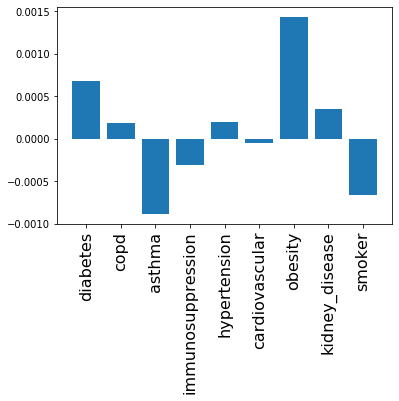

In [14]:
LinReg_model = LinearRegression()
# fit the model
LinReg_model.fit(X_train, y_train)
# get importance
importance = LinReg_model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],all_data.keys(),rotation=90, fontsize=16)
plt.show()

## Logistic Regression

Feature: 0, Score: 0.01137
Feature: 1, Score: 0.00444
Feature: 2, Score: -0.01363
Feature: 3, Score: -0.00878
Feature: 4, Score: 0.00424
Feature: 5, Score: -0.00149
Feature: 6, Score: 0.01999
Feature: 7, Score: 0.00716
Feature: 8, Score: -0.01050


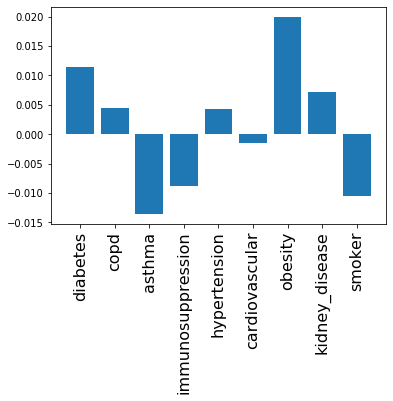

In [15]:
LogReg_model = LogisticRegression()
# fit the model
LogReg_model.fit(X_train, y_train)
# get importance
importance = LogReg_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

## Descicion Tree

Feature: 0, Score: 0.50855
Feature: 1, Score: 0.04289
Feature: 2, Score: 0.02070
Feature: 3, Score: 0.03643
Feature: 4, Score: 0.17016
Feature: 5, Score: 0.03511
Feature: 6, Score: 0.09340
Feature: 7, Score: 0.03536
Feature: 8, Score: 0.05741


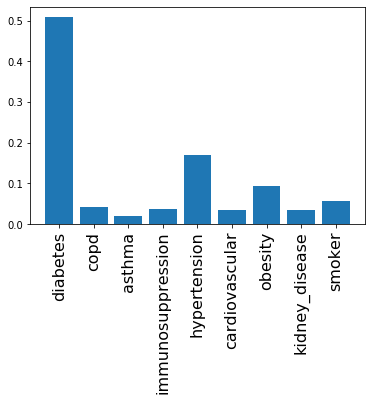

In [16]:
DesTree_model = DecisionTreeRegressor()
# fit the model
DesTree_model.fit(X_train, y_train)
# get importance
importance = DesTree_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

In [ ]:
X.keys()

Feature: 0, Score: 0.50714
Feature: 1, Score: 0.03989
Feature: 2, Score: 0.02387
Feature: 3, Score: 0.03493
Feature: 4, Score: 0.16342
Feature: 5, Score: 0.03656
Feature: 6, Score: 0.10111
Feature: 7, Score: 0.03534
Feature: 8, Score: 0.05774


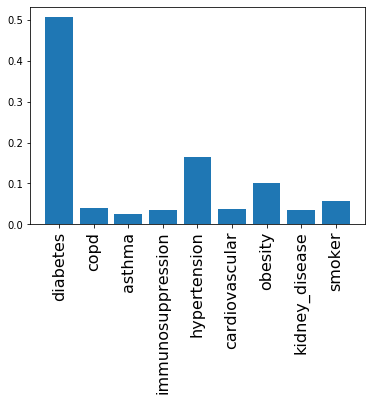

In [17]:
# define the model
DesTreeClass_model = DecisionTreeClassifier()
# fit the model
DesTreeClass_model.fit(X_train, y_train)
# get importance
importance = DesTreeClass_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

## RandomForest

Feature: 0, Score: 0.46677
Feature: 1, Score: 0.05145
Feature: 2, Score: 0.03440
Feature: 3, Score: 0.04353
Feature: 4, Score: 0.15800
Feature: 5, Score: 0.04948
Feature: 6, Score: 0.10190
Feature: 7, Score: 0.03892
Feature: 8, Score: 0.05556


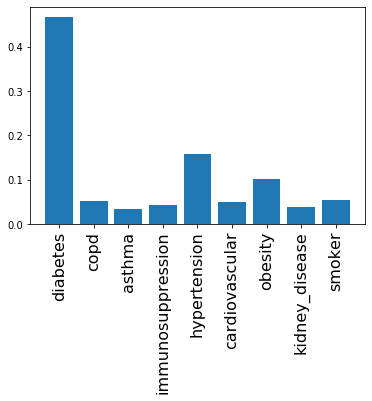

In [18]:
RanFoRe_model = RandomForestRegressor()
# fit the model
RanFoRe_model.fit(X_train, y_train)
# get importance
importance = RanFoRe_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

In [ ]:
X.keys()

Feature: 0, Score: 0.36311
Feature: 1, Score: 0.06316
Feature: 2, Score: 0.03339
Feature: 3, Score: 0.03941
Feature: 4, Score: 0.22923
Feature: 5, Score: 0.04915
Feature: 6, Score: 0.10818
Feature: 7, Score: 0.06528
Feature: 8, Score: 0.04909


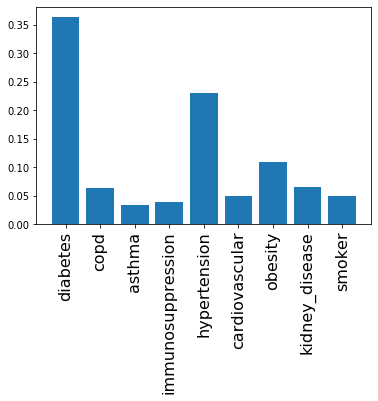

In [19]:
RFoClas_model = RandomForestClassifier()
# fit the model
RFoClas_model.fit(X_train, y_train)
# get importance
importance = RFoClas_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

## XGBRegressor

[19:04:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.67243
Feature: 1, Score: 0.02900
Feature: 2, Score: 0.01484
Feature: 3, Score: 0.00708
Feature: 4, Score: 0.15535
Feature: 5, Score: 0.01262
Feature: 6, Score: 0.05612
Feature: 7, Score: 0.02973
Feature: 8, Score: 0.02283


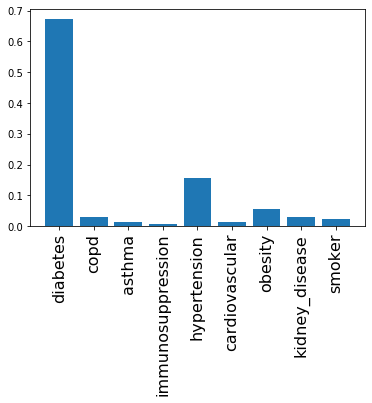

In [20]:
XGBRe_model = XGBRegressor()
# fit the model
XGBRe_model.fit(X_train, y_train)
# get importance
importance = XGBRe_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

Feature: 0, Score: 0.59680
Feature: 1, Score: 0.05468
Feature: 2, Score: 0.02070
Feature: 3, Score: 0.01228
Feature: 4, Score: 0.19105
Feature: 5, Score: 0.01919
Feature: 6, Score: 0.06321
Feature: 7, Score: 0.02523
Feature: 8, Score: 0.01686


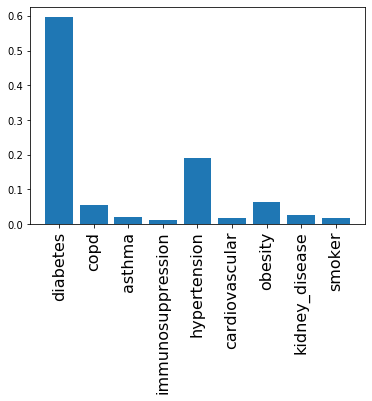

In [21]:
XGBclass_model = XGBClassifier()
# fit the model
XGBclass_model.fit(X_train, y_train)
# get importance
importance = XGBclass_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

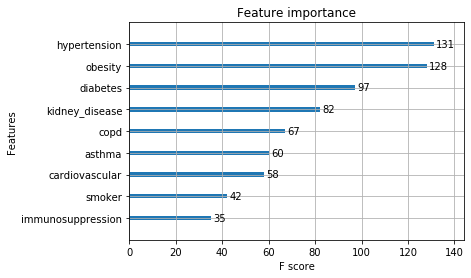

In [22]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# plot feature importance
plot_importance(model)
pyplot.show()

## K Neighbord Regressor

In [ ]:
KNeiRe_model = KNeighborsRegressor()
# fit the model
KNeiRe_model.fit(X, y)


In [ ]:
# perform permutation importance
results = permutation_importance(KNeiRe_model, X, y, scoring='neg_mean_squared_error')


In [ ]:
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
KNClas_model = KNeighborsClassifier()
# fit the model
KNClas_model.fit(X, y)
# perform permutation importance
results = permutation_importance(KNClas_model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

## and make the ages a bins of one hot

## and close this already!!!!